In [1]:
import fitsio
import numpy as np
import healpy

In [2]:
gold = fitsio.read("gold_2_0_r_lt_21_summary.fit")
gaia = fitsio.read("gaia.fits")

In [14]:
gold_mask = healpy.read_map("y6a2_foreground_mask_v1.2.fits.gz", nest=True)
gold_footprint = healpy.read_map("healpix_nest_y6a1_footprint_griz_frac05_nimages4.fits.gz", nest=True)

In [13]:
gold_inds = healpy.ang2pix(4096, gold["ra"], gold["dec"], nest=True, lonlat=True)
gaia_inds = healpy.ang2pix(4096, gaia["RA"], gaia["DEC"], nest=True, lonlat=True)

In [28]:
msk_gold = (
    (gold_footprint[gold_inds] > 0)
    & (gold_mask[gold_inds] <= 0)
    & (gold["mash"] == 0)
)

msk_gaia = (
    (gold_footprint[gaia_inds] > 0)
    & (gold_mask[gaia_inds] <= 0)
)

In [29]:
np.sum(msk_gold), np.sum(msk_gaia)

(10934539, 18968047)

In [32]:
import proplot as pplt

Text(0.5, 0, "gold r or GAIA 'G'")

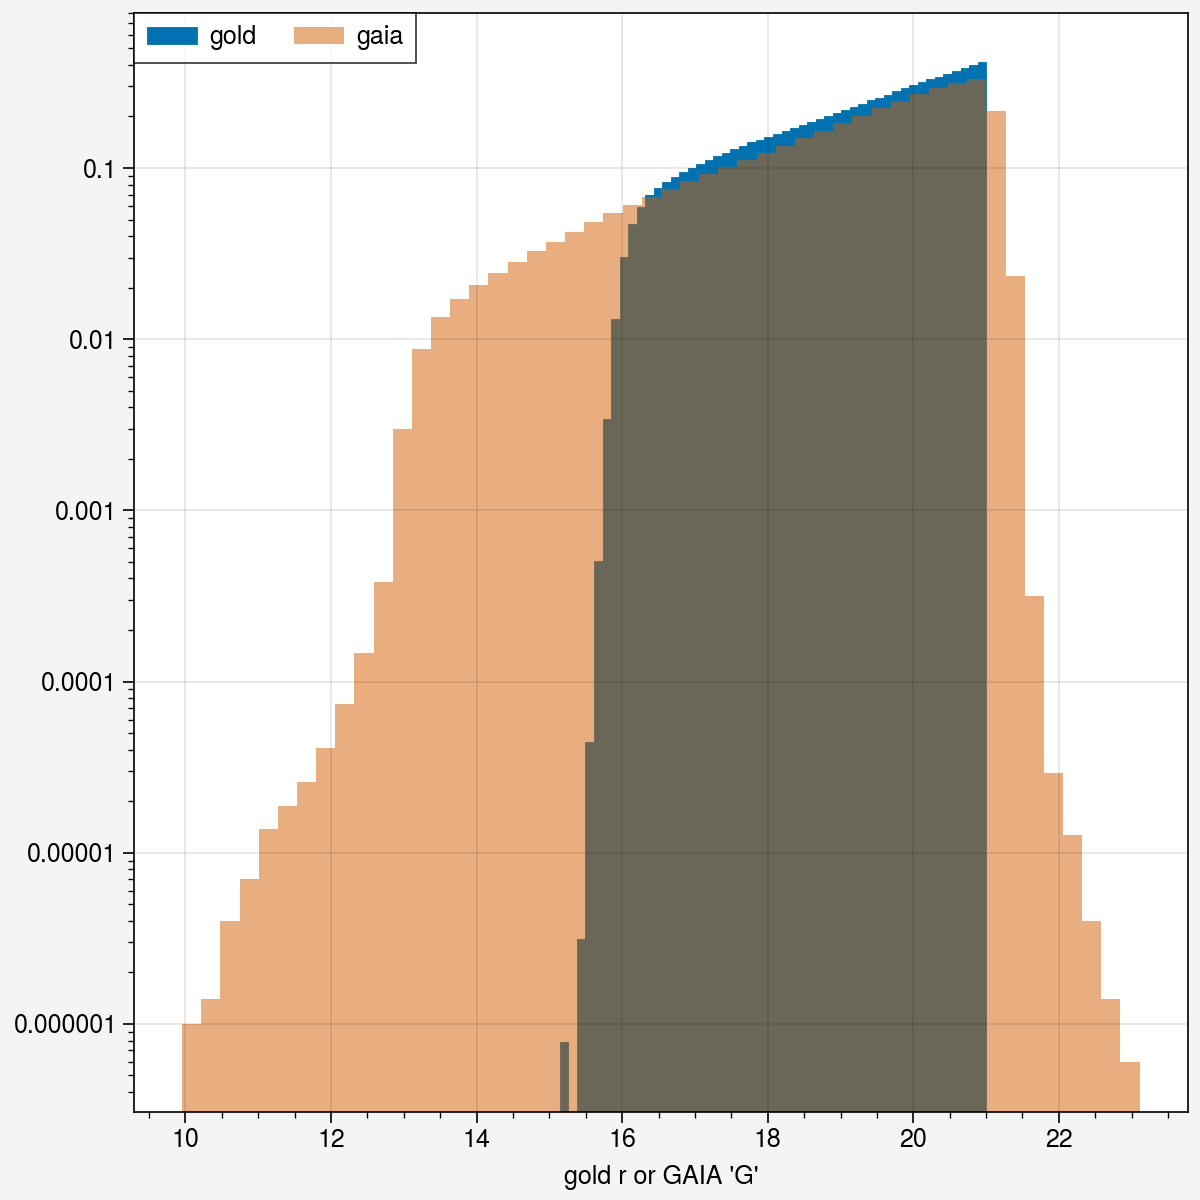

In [38]:
fig, axs = pplt.subplots(figsize=(6, 6))

axs.hist(gold["r_mag"][msk_gold], bins=50, log=True, density=True, label="gold")
axs.hist(gaia["PHOT_G_MEAN_MAG"][msk_gaia], bins=50, log=True, density=True, label="gaia", alpha=0.5)
axs.legend()
axs.set_xlabel("gold r or GAIA 'G'")

In [35]:
axs.hist?

In [2]:
gold = fitsio.read("gold_2_0_r_lt_21_summary.fit")

In [3]:
gold.dtype.names

('ra', 'dec', 'g_mag', 'r_mag', 'i_mag', 'z_mag', 'mash')

In [15]:
msk = (gold["mash"] == 0)

np.nanmean(gold["g_mag"][msk] - gold["i_mag"][msk]), np.nanmean(gold["i_mag"][msk] - gold["z_mag"][msk])

(1.5337992, 0.25237992)

In [16]:
msk = (gold["mash"] == 4)

np.nanmean(gold["g_mag"][msk] - gold["i_mag"][msk]), np.nanmean(gold["i_mag"][msk] - gold["z_mag"][msk])

(1.5105238, 0.27132568)